In [51]:
from collections import Counter
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt

# Part A

from collections import Counter
import pandas as pd
import numpy as np 

We have n points {x1 , x2 , .... , xn } and formulaes for variance and mean . Now we need to consider a population consisting of 100000 points uniformly distributed between 0.01 and 1000 . Ex : 
D = {0.01 , 0.02 , 0.03 , 0.04 ,  ..... , 1000} . 


We need to compute variance of this population D . We are calling it the true variance of the population . The variance comes out to be : 

In [52]:
dataset = np.linspace(0.01 , 1000 ,100000) ; 

def calculate_mean(x): 
  
  return sum(x) / len(x) ; 
  
def get_variance(x): 
  
  mean = calculate_mean(x) ; 
  sum1 = 0 ; 
  for i in x : 
    sum1 += ((i - mean) **2) 
    
  sum1 /= len(x) ; 
  
  return sum1 ; 


variance_true = get_variance(dataset) ; 

print("The variance of the Population(True) :" + str(variance_true)) ; 

The variance of the Population(True) :83333.333325


# Part  B

## Sampling with Replacement and Variance Calculation

To randomly sample 50 points {y₁, ..., y₅₀} from the population D, where for 1 ≤ i ≤ 50, yᵢ ∈ D, we compute the following variances:

1. **Sample Mean Calculation**:
   μ = (y₁ + y₂ + ... + y₅₀) / 50

2. **Variance Definitions**:
   - **Sample Variance with n + 1**:
     s²₁ = Σ(yᵢ - μ)² / (n + 1)

   - **Sample Variance with n**:
     s²₂ = Σ(yᵢ - μ)² / n

   - **Sample Variance with n - 1**:
     s²₃ = Σ(yᵢ - μ)² / (n - 1)

Where n = 50.


In [53]:
def variance1(x) : 
  ans = 0 ; 
  
  val_avg = calculate_mean(x) ; 
  
  
  # here n = len(x) ; 
  
  return sum((x - val_avg)**2)/(len(x)+1)

def variance2(x) : 
  ans = 0 ; 
  
  val_avg = calculate_mean(x) ; 
  
  
  # here n = len(x) ; 
  
  return sum((x - val_avg)**2)/(len(x))


def variance3(x) : 
  ans = 0 ; 
  
  val_avg = calculate_mean(x) ; 
  
  
  # here n = len(x) ; 
  
  return sum((x - val_avg)**2)/(len(x)-1)



def get_sample(dataset): 
  
  indices = np.random.randint(0 , 100000, 50) ; 
  
  dataset_sample = dataset[indices] ; 
  
  
  return dataset_sample ; 

dataset1 = get_sample(dataset) ; 
# print(d1.shape)


print("Value of s1: " + str(variance1(dataset1)) ) 
print("Value of s2: " + str(variance2(dataset1)) ) 
print("Value of s3: " + str(variance3(dataset1)) ) 



Value of s1: 61401.635741176455
Value of s2: 62629.668455999985
Value of s3: 63907.82495510203


Now lets run the above code for the second time . 

In [54]:
dataset2 = get_sample(dataset) ; 

print("Value of s1: " + str(variance1(dataset2)) ) 
print("Value of s2: " + str(variance2(dataset2)) ) 
print("Value of s3: " + str(variance3(dataset2)) ) 

Value of s1: 90954.14100788234
Value of s2: 92773.22382803999
Value of s3: 94666.55492657142


# Part c

We need to maintain the averages of variance found using s1^2 , s2^2 and s3^2 . Thus we can do that as follows : 

We stored the average from the first two iterations in the respective arrays of s1, s2 and s3 . Now we can apply this thing for multiple iterations , We are using 600 iterations to do the same . 

In [55]:
average_s1 = ( variance1(dataset1) + variance1(dataset2) ) / 2 ; 

average_s2 = ( variance2(dataset1) + variance2(dataset2) ) / 2 ; 

average_s3 = ( variance3(dataset1) + variance3(dataset2) ) / 2 ; 

print(average_s1) ; 
print(average_s2) ; 
print(average_s3) ;  

# lets store them in some lists ; 

average_s1_scores = [] ; 
average_s2_scores = [] ; 
average_s3_scores = [] ; 

average_s1_scores.append(average_s1) ; 
average_s2_scores.append(average_s2) ; 
average_s3_scores.append(average_s3) ; 



# we repeat these steps for 600 steps and update the scores accordingly 
 
for i in range(3 , 600) : 
  dataset_new = get_sample(dataset) ; 
  
  new_average_s1 = ( average_s1_scores[-1] * (i-1) + variance1(dataset_new) ) / i ; 
  
  new_average_s2 = ( average_s2_scores[-1] * (i-1) + variance2(dataset_new) ) / i ; 
  
  new_average_s3 = ( average_s3_scores[-1] * (i-1) + variance3(dataset_new) ) / i ; 
  
  average_s1_scores.append(new_average_s1) ; 
  average_s2_scores.append(new_average_s2) ; 
  average_s3_scores.append(new_average_s3) ; 
  


76177.8883745294
77701.44614202
79287.18994083672


Plotting the graph for Average_s1 ; 

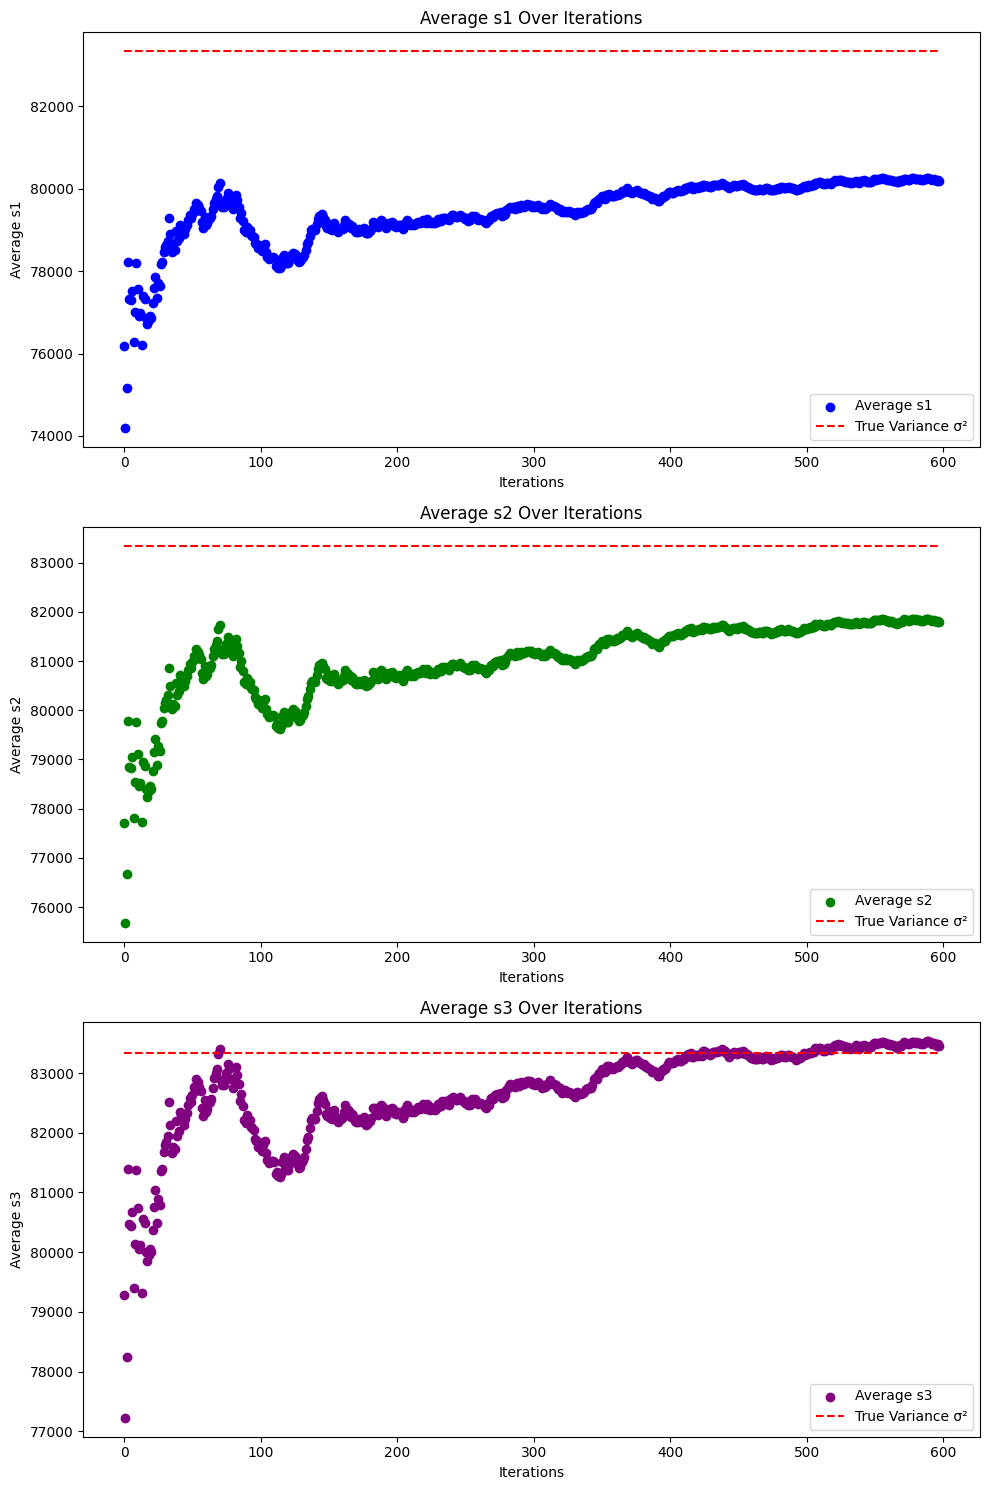

In [56]:
true_variance = [variance_true] * len(average_s2_scores)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))

axes[0].scatter(range(len(average_s1_scores)), average_s1_scores, color='blue', label='Average s1')
axes[0].plot(range(len(average_s1_scores)), true_variance, color='red', linestyle='--', label='True Variance σ²')
axes[0].set_title('Average s1 Over Iterations')
axes[0].set_xlabel('Iterations')
axes[0].set_ylabel('Average s1')
axes[0].legend()


axes[1].scatter(range(len(average_s2_scores)), average_s2_scores, color='green', label='Average s2')
axes[1].plot(range(len(average_s2_scores)), true_variance, color='red', linestyle='--', label='True Variance σ²')
axes[1].set_title('Average s2 Over Iterations')
axes[1].set_xlabel('Iterations')
axes[1].set_ylabel('Average s2')
axes[1].legend()

axes[2].scatter(range(len(average_s3_scores)), average_s3_scores, color='purple', label='Average s3')
axes[2].plot(range(len(average_s3_scores)), true_variance, color='red', linestyle='--', label='True Variance σ²')
axes[2].set_title('Average s3 Over Iterations')
axes[2].set_xlabel('Iterations')
axes[2].set_ylabel('Average s3')
axes[2].legend()

# Show the plots
plt.tight_layout()
plt.show()

# Part E

Lets plot the three scatter plots in the same plot along with the line for the true variance and see which score approaches to the true variance quickly . 

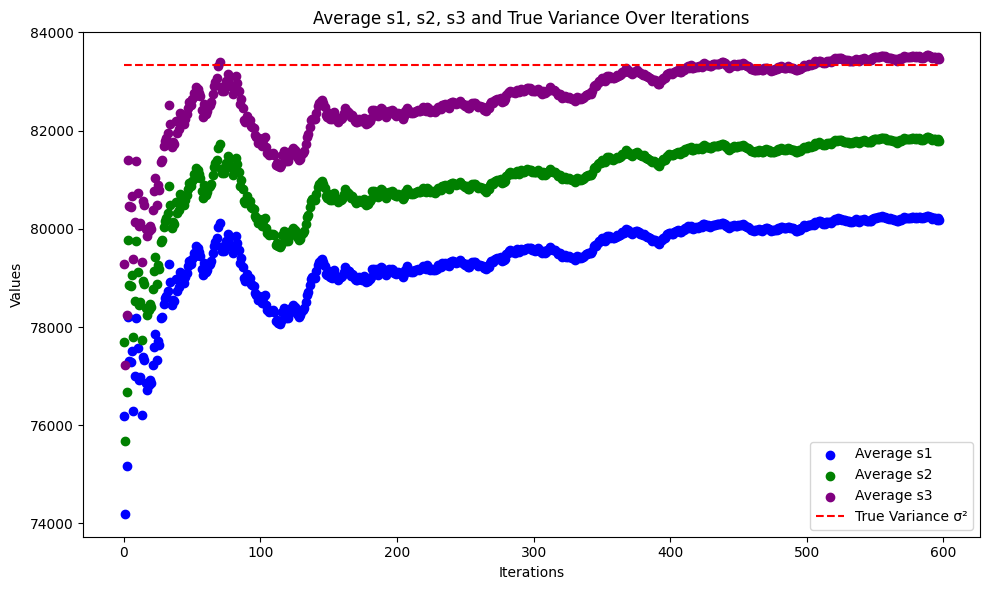

In [57]:
true_variance = [variance_true] * len(average_s2_scores)


plt.figure(figsize=(10, 6))

plt.scatter(range(len(average_s1_scores)), average_s1_scores, color='blue', label='Average s1')

plt.scatter(range(len(average_s2_scores)), average_s2_scores, color='green', label='Average s2')

plt.scatter(range(len(average_s3_scores)), average_s3_scores, color='purple', label='Average s3')

plt.plot(range(len(average_s2_scores)), true_variance, color='red', linestyle='--', label='True Variance σ²')

plt.title('Average s1, s2, s3 and True Variance Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()

## Observation

- After running the code for multiple times , we observe that the Avg_s3^2 converges faster towards the true variance as compared to the other two variance parameters . 

- The reason for this could be that $s_{3}^{2}$:
$$
s_{3}^{2} = \frac{\sum_{i = 1}^{n} (y_i - \mu)^2}{n-1}
$$

This is an unbiased estimator , This means that it excludes the current point and calculates the variance of the sample which makes it a much better estimator of the true variance.

- Another reason is that we are using $n-1$ instead of $n$ for variance estimation of the population based off a sample from it. This is also called Bessel's correction and it reduces the degree of freedom from $n$ to $n-1$ thus keeping our estimate unbiased and closer to the true variance.